In [1]:
import pandas as pd
import os
from pathlib import Path

# Table with models comparison

In [2]:
PATH = str(Path.cwd() / "baselines" / "training_results.csv")
df = pd.read_csv(PATH)

In [3]:
df['sd_train_accuracy'] = df['sd_train_accuracy'].round(decimals = 3)
df['sd_test_accuracy'] = df['sd_test_accuracy'].round(decimals = 3)
df['mean_train_accuracy'] = df['mean_train_accuracy']*100
df['mean_test_accuracy'] = df['mean_test_accuracy']*100
df['mean_test_accuracy'] = df['mean_test_accuracy'].round(decimals = 2)
df['mean_train_accuracy'] = df['mean_train_accuracy'].round(decimals = 2)

In [4]:
df

,dataset,model,mean_train_accuracy,sd_train_accuracy,mean_test_accuracy,sd_test_accuracy
0,red_wine,BaggingClassifier,99.99,0.000,91.76,0.004
1,red_wine,RandomForestClassifier,100.00,0.000,92.01,0.005
2,red_wine,ExtraTreesClassifier,100.00,0.000,92.01,0.005
3,red_wine,XGBoost,100.00,0.000,92.19,0.000
4,red_wine,EvoBagging,99.60,0.001,91.89,0.004
5,abalone,BaggingClassifier,99.98,0.000,61.52,0.008
6,abalone,RandomForestClassifier,99.99,0.000,62.59,0.007
7,abalone,ExtraTreesClassifier,100.00,0.000,61.30,0.008
8,abalone,XGBoost,92.73,0.000,63.40,0.000
9,abalone,EvoBagging,74.01,0.003,63.16,0.007


# Optimal hyper parameters

In [5]:
PATH = str(Path.cwd() / "optimal_bag_number" / "results_optimal_bags.csv")

In [6]:
df = pd.read_csv(PATH)

In [7]:
import json
PATH = str(Path.cwd() / "evobagging_grid_search" / "params.json")
f = open(PATH)
params = json.load(f)
f.close
pd.DataFrame.from_dict(params, orient='index')

,G,M,MS,K
mnist,0.30,0.07,0.05,4000
breast_cancer,0.15,0.08,0.05,12000
abalone,0.30,0.05,0.05,9000
red_wine,0.25,0.10,0.10,10000
pima,0.15,0.06,0.05,11000
car,0.30,0.06,0.05,11000
tic-tac-toe,0.15,0.05,0.05,4000
ionosphere,0.10,0.07,0.05,10000
churn,0.20,0.05,0.05,4000
flare,0.10,0.09,0.05,12000


# Nbit parity graphs

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [9]:
PATH = str(Path.cwd() / "nbit_parity" / "nbit_parity.csv")
df = pd.read_csv(PATH)
df

,nbit,model,n_bags,mean_train_accuracy,sd_train_accuracy,mean_test_accuracy,sd_test_accuracy
0,6,BaggingClassifier,5,0.834641,0.041031,0.076923,0.056177
1,6,RandomForestClassifier,5,0.839869,0.037914,0.046154,0.058245
2,6,ExtraTreesClassifier,5,1.000000,0.000000,0.005128,0.019188
3,6,EvoBagging,5,0.889542,0.022347,0.066667,0.055232
4,6,BaggingClassifier,10,0.908497,0.036625,0.064103,0.056469
...,...,...,...,...,...,...,...
147,8,EvoBagging,90,1.000000,0.000000,0.010897,0.011837
148,8,BaggingClassifier,95,0.999673,0.001223,0.003846,0.009156
149,8,RandomForestClassifier,95,0.999837,0.000880,0.000641,0.003452
150,8,ExtraTreesClassifier,95,1.000000,0.000000,0.000000,0.000000


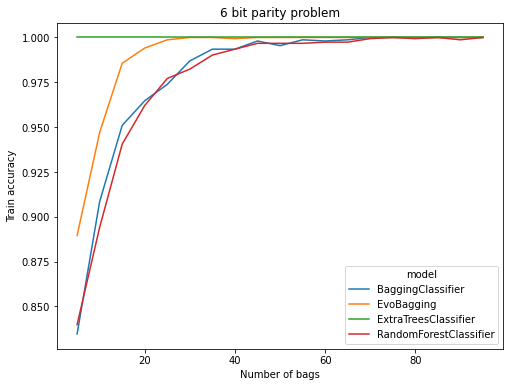

In [10]:
df_filtered = df[df['nbit'] == 6].drop(columns = ["nbit", "sd_train_accuracy", "mean_test_accuracy", "sd_test_accuracy"])
pivoted = pd.pivot_table(df_filtered, values='mean_train_accuracy', index='n_bags', columns='model')

ax = pivoted.plot(kind='line', figsize=(8,6))

# optional: set x-axis and y-axis labels
ax.set_xlabel('Number of bags')
ax.set_ylabel('Train accuracy')

# optional: set a title for the plot
ax.set_title('6 bit parity problem')

plt.show()

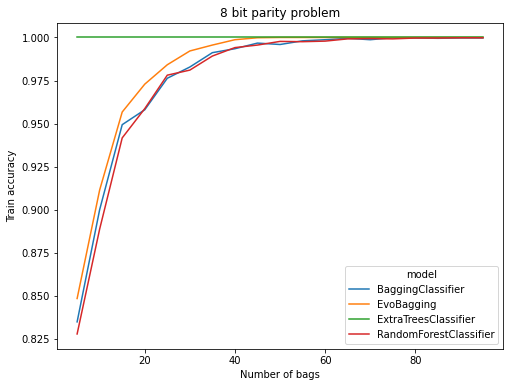

In [11]:
df_filtered = df[df['nbit'] == 8].drop(columns = ["nbit", "sd_train_accuracy", "mean_test_accuracy", "sd_test_accuracy"])
pivoted = pd.pivot_table(df_filtered, values='mean_train_accuracy', index='n_bags', columns='model')

ax = pivoted.plot(kind='line', figsize=(8,6))

# optional: set x-axis and y-axis labels
ax.set_xlabel('Number of bags')
ax.set_ylabel('Train accuracy')

# optional: set a title for the plot
ax.set_title('8 bit parity problem')

plt.show()

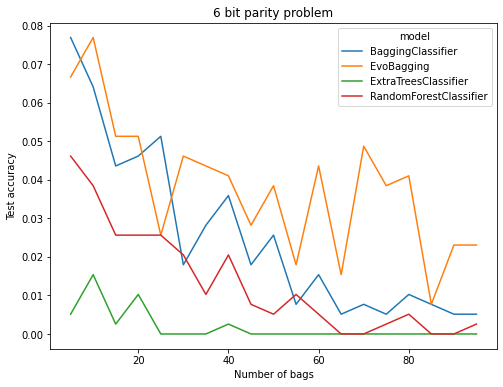

In [12]:
df_filtered = df[df['nbit'] == 6].drop(columns = ["nbit", "sd_train_accuracy", "mean_train_accuracy", "sd_test_accuracy"])
pivoted = pd.pivot_table(df_filtered, values='mean_test_accuracy', index='n_bags', columns='model')

ax = pivoted.plot(kind='line', figsize=(8,6))

# optional: set x-axis and y-axis labels
ax.set_xlabel('Number of bags')
ax.set_ylabel('Test accuracy')

# optional: set a title for the plot
ax.set_title('6 bit parity problem')

plt.show()

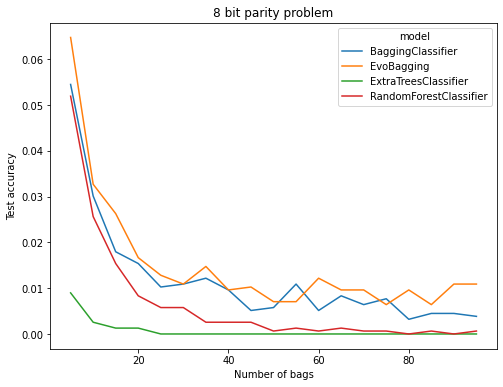

In [13]:
df_filtered = df[df['nbit'] == 8].drop(columns = ["nbit", "sd_train_accuracy", "mean_train_accuracy", "sd_test_accuracy"])
pivoted = pd.pivot_table(df_filtered, values='mean_test_accuracy', index='n_bags', columns='model')

ax = pivoted.plot(kind='line', figsize=(8,6))

# optional: set x-axis and y-axis labels
ax.set_xlabel('Number of bags')
ax.set_ylabel('Test accuracy')

# optional: set a title for the plot
ax.set_title('8 bit parity problem')

plt.show()

# Hyper parameter influence

## G sensivity

In [14]:
PATH = str(Path.cwd() / "influence_of_hyper_parameters" / "generation_gap.csv")
df = pd.read_csv(PATH)
df['G'] = df['G']*100
df['G'] = df['G'].round(decimals = 2)
df['G'] = df['G'].apply(lambda x : str(x)+" %")
df

,G,iteration,avg_fitness,restricted
0,3.33 %,0,1.007859,True
1,3.33 %,1,1.020754,True
2,3.33 %,2,1.025542,True
3,3.33 %,3,1.024169,True
4,3.33 %,4,1.033457,True
...,...,...,...,...
155,50.0 %,11,1.048141,False
156,50.0 %,12,1.048873,False
157,50.0 %,13,1.047091,False
158,50.0 %,14,1.046905,False


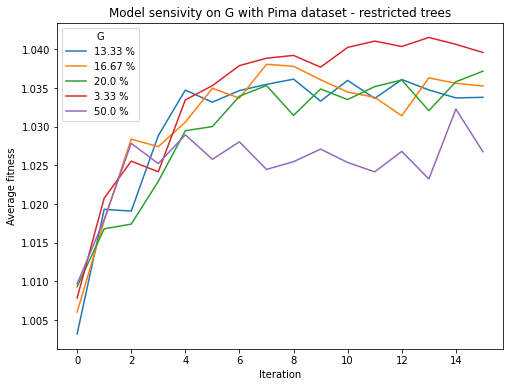

In [15]:
df_filtered = df[df['restricted'] == True].drop(columns = ["restricted"])
pivoted = pd.pivot_table(df_filtered, values='avg_fitness', index='iteration', columns='G')

ax = pivoted.plot(kind='line', figsize=(8,6))

# optional: set x-axis and y-axis labels
ax.set_xlabel('Iteration')
ax.set_ylabel('Average fitness')

# optional: set a title for the plot
ax.set_title('Model sensivity on G with Pima dataset - restricted trees')

plt.show()

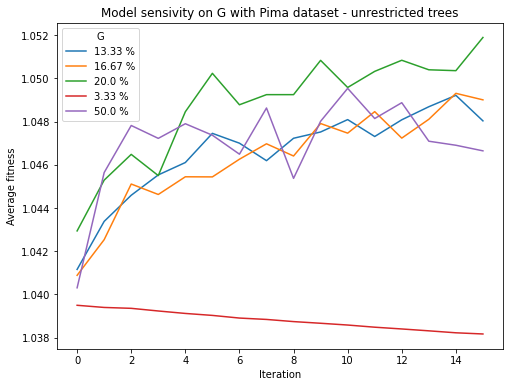

In [16]:
df_filtered = df[df['restricted'] == False].drop(columns = ["restricted"])
pivoted = pd.pivot_table(df_filtered, values='avg_fitness', index='iteration', columns='G')

ax = pivoted.plot(kind='line', figsize=(8,6))

# optional: set x-axis and y-axis labels
ax.set_xlabel('Iteration')
ax.set_ylabel('Average fitness')

# optional: set a title for the plot
ax.set_title('Model sensivity on G with Pima dataset - unrestricted trees')

plt.show()

## Maximum bag size S sensivity

In [17]:
PATH = str(Path.cwd() / "influence_of_hyper_parameters" / "maximum_bag_size_s.csv")
df = pd.read_csv(PATH)
df['test_accuracy'] = df['test_accuracy'].round(2)
df['avg_bag_size'] = df['avg_bag_size'].round(1)
df['avg_tree_depth'] = df['avg_tree_depth'].round(1)
df[df['restricted'] == False]

,ratio,test_accuracy,avg_bag_size,avg_tree_depth,restricted
4,0.25,75.32,142.2,8.7,False
5,0.50,74.68,273.6,11.4,False
6,0.75,76.62,405.2,11.9,False
7,1.00,75.32,526.7,12.4,False


In [18]:
df[df['restricted'] == True]

,ratio,test_accuracy,avg_bag_size,avg_tree_depth,restricted
0,0.25,74.03,122.5,7.3,True
1,0.50,72.08,240.7,8.0,True
2,0.75,75.97,366.9,8.0,True
3,1.00,74.68,441.7,8.0,True


## Mutated bags M sensivity

In [19]:
PATH = str(Path.cwd() / "influence_of_hyper_parameters" / "mutated_bags.csv")
df = pd.read_csv(PATH)
df['M'] = df['M']*100
df['M'] = df['M'].round(decimals = 2)
df['M'] = df['M'].apply(lambda x : str(x)+" %")
df

,M,iteration,avg_fitness,restricted
0,1.0 %,0,1.004251,True
1,1.0 %,1,1.020970,True
2,1.0 %,2,1.030806,True
3,1.0 %,3,1.031210,True
4,1.0 %,4,1.033149,True
...,...,...,...,...
123,20.0 %,11,1.047244,False
124,20.0 %,12,1.047234,False
125,20.0 %,13,1.046191,False
126,20.0 %,14,1.047115,False


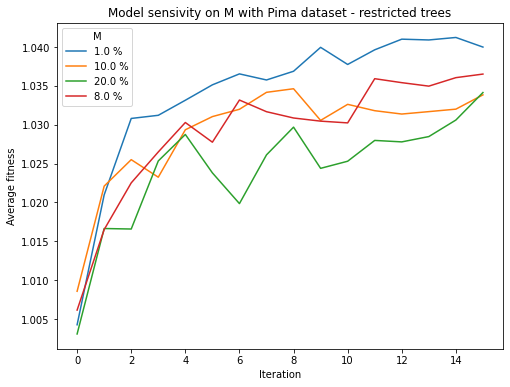

In [20]:
df_filtered = df[df['restricted'] == True].drop(columns = ["restricted"])
pivoted = pd.pivot_table(df_filtered, values='avg_fitness', index='iteration', columns='M')

ax = pivoted.plot(kind='line', figsize=(8,6))

# optional: set x-axis and y-axis labels
ax.set_xlabel('Iteration')
ax.set_ylabel('Average fitness')

# optional: set a title for the plot
ax.set_title('Model sensivity on M with Pima dataset - restricted trees')

plt.show()

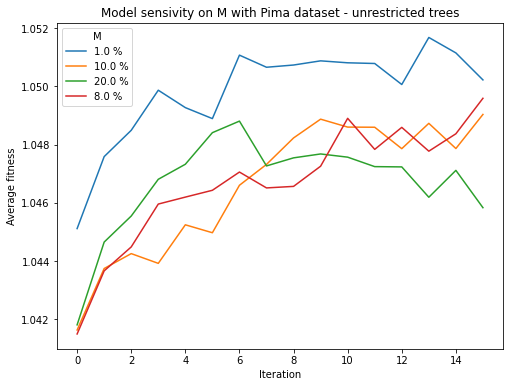

In [21]:
df_filtered = df[df['restricted'] == False].drop(columns = ["restricted"])
pivoted = pd.pivot_table(df_filtered, values='avg_fitness', index='iteration', columns='M')

ax = pivoted.plot(kind='line', figsize=(8,6))

# optional: set x-axis and y-axis labels
ax.set_xlabel('Iteration')
ax.set_ylabel('Average fitness')

# optional: set a title for the plot
ax.set_title('Model sensivity on M with Pima dataset - unrestricted trees')

plt.show()

## Bag size sensivity

In [22]:
PATH = str(Path.cwd() / "influence_of_hyper_parameters" / "bag_size.csv")
df = pd.read_csv(PATH)
df['test_accuracy'] = df['test_accuracy'].round(decimals = 2)
df['avg_bag_size'] = df['avg_bag_size'].round(decimals = 1)
df[df['restricted'] == False]

,K,test_accuracy,avg_bag_size,restricted
4,1000,74.03,551.3,False
5,2000,72.73,559.3,False
6,10000,71.43,560.2,False
7,20000,72.73,551.8,False


In [23]:
df[df['restricted'] == True]

,K,test_accuracy,avg_bag_size,restricted
0,1000,75.97,470.0,True
1,2000,72.08,486.8,True
2,10000,75.97,454.1,True
3,20000,74.03,493.7,True


## Mutation size sensivity

In [24]:
PATH = str(Path.cwd() / "influence_of_hyper_parameters" / "mutation_size.csv")
df = pd.read_csv(PATH)
df['MS'] = df['MS']*100
df['MS'] = df['MS'].round(decimals = 2)
df['MS'] = df['MS'].apply(lambda x : str(x)+" %")
df

,MS,iteration,avg_fitness,restricted
0,1.0 %,0,1.010259,True
1,1.0 %,1,1.018855,True
2,1.0 %,2,1.027101,True
3,1.0 %,3,1.030947,True
4,1.0 %,4,1.024943,True
...,...,...,...,...
123,20.0 %,11,1.048407,False
124,20.0 %,12,1.048005,False
125,20.0 %,13,1.048397,False
126,20.0 %,14,1.049024,False


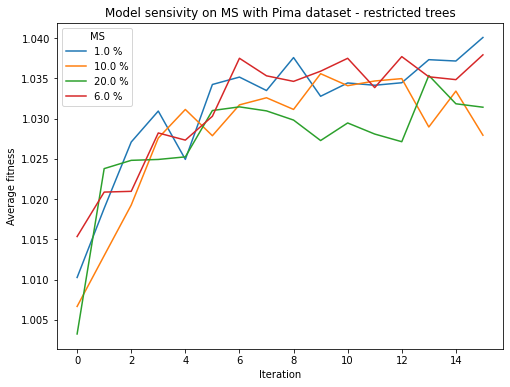

In [25]:
df_filtered = df[df['restricted'] == True].drop(columns = ["restricted"])
pivoted = pd.pivot_table(df_filtered, values='avg_fitness', index='iteration', columns='MS')

ax = pivoted.plot(kind='line', figsize=(8,6))

# optional: set x-axis and y-axis labels
ax.set_xlabel('Iteration')
ax.set_ylabel('Average fitness')

# optional: set a title for the plot
ax.set_title('Model sensivity on MS with Pima dataset - restricted trees')

plt.show()

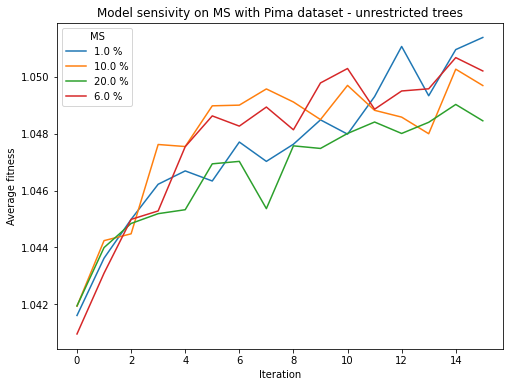

In [26]:
df_filtered = df[df['restricted'] == False].drop(columns = ["restricted"])
pivoted = pd.pivot_table(df_filtered, values='avg_fitness', index='iteration', columns='MS')

ax = pivoted.plot(kind='line', figsize=(8,6))

# optional: set x-axis and y-axis labels
ax.set_xlabel('Iteration')
ax.set_ylabel('Average fitness')

# optional: set a title for the plot
ax.set_title('Model sensivity on MS with Pima dataset - unrestricted trees')

plt.show()

# Bias reduction

In [27]:
PATH = str(Path.cwd() / "bias_reduction" / "bias_reduction_graph.csv")
df = pd.read_csv(PATH)
df

,dataset_name,iteration,bias,restricted
0,breast_cancer,0,0.039016,True
1,breast_cancer,1,0.036248,True
2,breast_cancer,2,0.035655,True
3,breast_cancer,3,0.034930,True
4,breast_cancer,4,0.034996,True
...,...,...,...,...
83,mnist,6,0.067989,False
84,mnist,7,0.068693,False
85,mnist,8,0.066254,False
86,mnist,9,0.067727,False


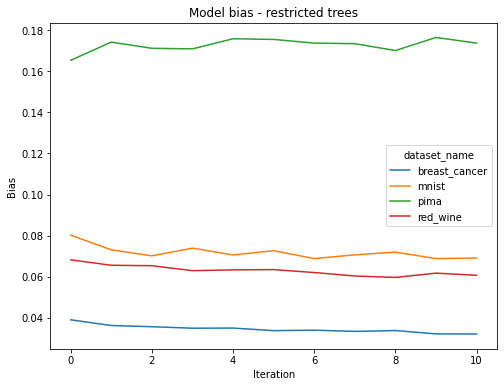

In [28]:
df_filtered = df[df['restricted'] == True].drop(columns = ["restricted"])
pivoted = pd.pivot_table(df_filtered, values='bias', index='iteration', columns='dataset_name')

ax = pivoted.plot(kind='line', figsize=(8,6))

# optional: set x-axis and y-axis labels
ax.set_xlabel('Iteration')
ax.set_ylabel('Bias')

# optional: set a title for the plot
ax.set_title('Model bias - restricted trees')

plt.show()

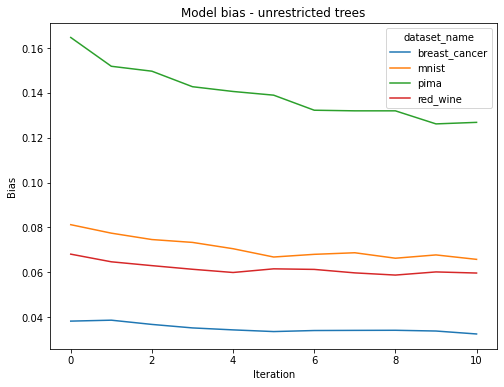

In [29]:
df_filtered = df[df['restricted'] == False].drop(columns = ["restricted"])
pivoted = pd.pivot_table(df_filtered, values='bias', index='iteration', columns='dataset_name')

ax = pivoted.plot(kind='line', figsize=(8,6))

# optional: set x-axis and y-axis labels
ax.set_xlabel('Iteration')
ax.set_ylabel('Bias')

# optional: set a title for the plot
ax.set_title('Model bias - unrestricted trees')

plt.show()

In [30]:
PATH = str(Path.cwd() / "bias_reduction" / "bias_reduction_table.csv")
df = pd.read_csv(PATH)
df["reduction"] = df["reduction"].round(1)
df["first_bias"] = df["first_bias"].round(3)
df["last_bias"] = df["last_bias"].round(3)
df['reduction'] = df['reduction'].apply(lambda x : str(x)+" %")
df[df["restricted"]==False]

,dataset_name,first_bias,last_bias,reduction,restricted
1,red_wine,0.067,0.058,14.0 %,False
3,abalone,0.233,0.188,19.3 %,False
5,breast_cancer,0.040,0.033,16.2 %,False
7,pima,0.155,0.133,14.5 %,False
9,mnist,0.084,0.070,16.7 %,False
11,car,0.022,0.017,21.1 %,False
13,tic-tac-toe,0.040,0.031,22.2 %,False
15,ionosphere,0.064,0.051,20.8 %,False
17,churn,0.041,0.034,17.0 %,False
19,flare,0.152,0.153,-1.0 %,False


In [31]:
PATH = str(Path.cwd() / "bias_reduction" / "bias_reduction_table.csv")
df = pd.read_csv(PATH)
df["reduction"] = df["reduction"].round(1)
df["first_bias"] = df["first_bias"].round(3)
df["last_bias"] = df["last_bias"].round(3)
df['reduction'] = df['reduction'].apply(lambda x : str(x)+" %")
df[df["restricted"]==True]

,dataset_name,first_bias,last_bias,reduction,restricted
0,red_wine,0.071,0.060,15.4 %,True
2,abalone,0.332,0.356,-7.1 %,True
4,breast_cancer,0.038,0.032,17.8 %,True
6,pima,0.160,0.171,-7.2 %,True
8,mnist,0.080,0.068,15.1 %,True
10,car,0.024,0.018,24.9 %,True
12,tic-tac-toe,0.039,0.030,23.0 %,True
14,ionosphere,0.057,0.051,10.2 %,True
16,churn,0.040,0.036,10.0 %,True
18,flare,0.152,0.161,-5.5 %,True


# Voting effect

In [32]:
PATH = str(Path.cwd() / "voting_rule" / "voting_influence.csv")
df = pd.read_csv(PATH)
df

,dataset_name,iteration,voting_rule,test_accuracy
0,pima,0,majority,0.733766
1,pima,0,weighted,0.746753
2,pima,1,majority,0.720779
3,pima,1,weighted,0.727273
4,pima,2,majority,0.753247
...,...,...,...,...
79,two-spiral,18,weighted,0.448718
80,two-spiral,19,majority,0.500000
81,two-spiral,19,weighted,0.500000
82,two-spiral,20,majority,0.474359


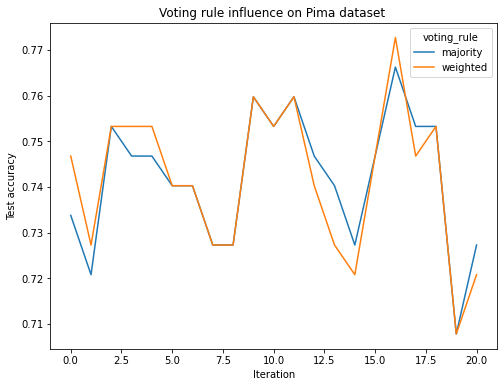

In [33]:
df_filtered = df[df['dataset_name'] == "pima"].drop(columns = ["dataset_name"])
pivoted = pd.pivot_table(df_filtered, values='test_accuracy', index='iteration', columns='voting_rule')

ax = pivoted.plot(kind='line', figsize=(8,6))

# optional: set x-axis and y-axis labels
ax.set_xlabel('Iteration')
ax.set_ylabel('Test accuracy')

# optional: set a title for the plot
ax.set_title('Voting rule influence on Pima dataset ')

plt.show()

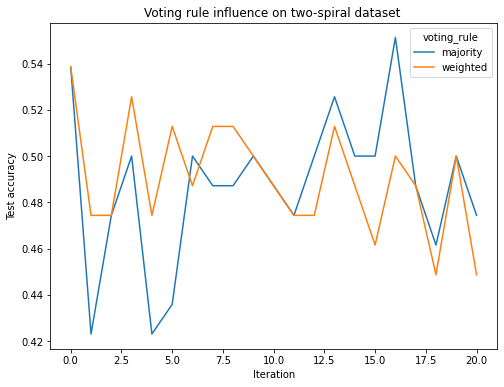

In [34]:
df_filtered = df[df['dataset_name'] == "two-spiral"].drop(columns = ["dataset_name"])
pivoted = pd.pivot_table(df_filtered, values='test_accuracy', index='iteration', columns='voting_rule')

ax = pivoted.plot(kind='line', figsize=(8,6))

# optional: set x-axis and y-axis labels
ax.set_xlabel('Iteration')
ax.set_ylabel('Test accuracy')

# optional: set a title for the plot
ax.set_title('Voting rule influence on two-spiral dataset ')

plt.show()

In [35]:
PATH = str(Path.cwd() / "voting_rule" / "voting_influence_corrected.csv")
df = pd.read_csv(PATH)

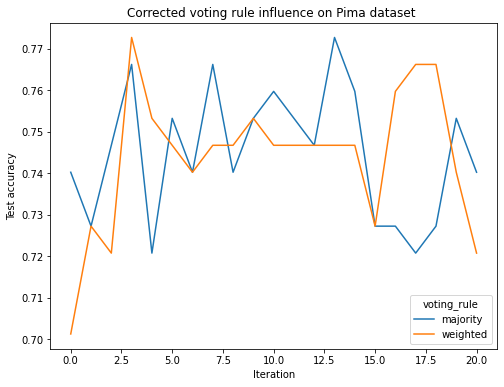

In [36]:
df_filtered = df[df['dataset_name'] == "pima"].drop(columns = ["dataset_name"])
pivoted = pd.pivot_table(df_filtered, values='test_accuracy', index='iteration', columns='voting_rule')

ax = pivoted.plot(kind='line', figsize=(8,6))

# optional: set x-axis and y-axis labels
ax.set_xlabel('Iteration')
ax.set_ylabel('Test accuracy')

# optional: set a title for the plot
ax.set_title('Corrected voting rule influence on Pima dataset ')

plt.show()

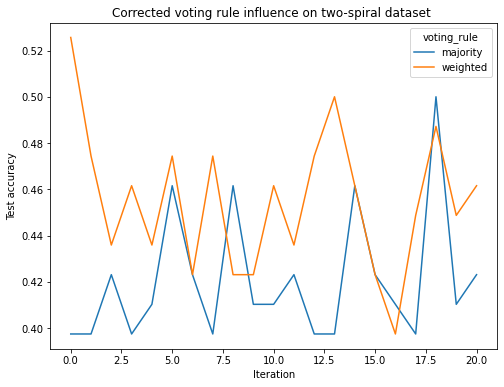

In [37]:
df_filtered = df[df['dataset_name'] == "two-spiral"].drop(columns = ["dataset_name"])
pivoted = pd.pivot_table(df_filtered, values='test_accuracy', index='iteration', columns='voting_rule')

ax = pivoted.plot(kind='line', figsize=(8,6))

# optional: set x-axis and y-axis labels
ax.set_xlabel('Iteration')
ax.set_ylabel('Test accuracy')

# optional: set a title for the plot
ax.set_title('Corrected voting rule influence on two-spiral dataset ')

plt.show()

# Diversity across bags

In [38]:
PATH = str(Path.cwd() / "diveristy_between_evolved_bags" / "diversity_between_bags.csv")
df = pd.read_csv(PATH)
df["bagging_measure"] = df["bagging_measure"].round(3)
df["evobagging_measure"] = df["evobagging_measure"].round(3)
df

,dataset_name,measure,bagging_measure,evobagging_measure
0,red_wine,Q statistics,0.767,0.753
1,red_wine,Disagreement,0.157,0.161
2,red_wine,Double fault,0.062,0.061
3,red_wine,KW variance,0.077,0.079
4,red_wine,Entropy,0.213,0.215
5,red_wine,Generalized diversity,0.558,0.569
6,ring,Q statistics,0.635,0.631
7,ring,Disagreement,0.181,0.186
8,ring,Double fault,0.048,0.051
9,ring,KW variance,0.089,0.092
